In [ ]:
import pandas as pd

# Load the data from the CSV file into a Pandas DataFrame
data = pd.read_csv("/content/deceptive-opinion.csv")

# Print the first five rows of the DataFrame
data.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [ ]:
# Create a new column "review_ID" with unique identifiers
data["review_ID"] = range(1, len(data) + 1)


In [ ]:
data.head()

,deceptive,hotel,polarity,source,text,review_ID
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,1
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,2
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,3
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,4
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,5


In [ ]:
# Create DataFrame
hotel_reviews = pd.DataFrame(data)

hotel_reviews

,deceptive,hotel,polarity,source,text,review_ID
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,1
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,2
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,3
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,4
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,5
...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,1596
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,1597
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,1598
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...",1599


In [ ]:
# Generate unique review IDs
data['review_ID'] = range(1, len(data) + 1)

In [ ]:
# Calculate the number of words in each review and create a new DataFrame
hotel_review_length = pd.DataFrame({'review_ID': data['review_ID'],
                                    'hotel_review_length': data['text'].apply(lambda x: len(str(x).split()))})

In [ ]:
hotel_review_length

,review_ID,hotel_review_length
0,1,105
1,2,45
2,3,207
3,4,127
4,5,72
...,...,...
1595,1596,131
1596,1597,121
1597,1598,141
1598,1599,86


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Remove stop words
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Remove numbers
data['text'] = data['text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [ ]:
from nltk.stem import WordNetLemmatizer

# Download wordnet if not already downloaded
nltk.download('wordnet')

# Lemmatize each word
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from collections import Counter

# Tokenize and count words
word_count = Counter(word_tokenize(' '.join(data['text'])))

# Get the 10 most common words
top_10_words = word_count.most_common(10)
print(top_10_words)


[('.', 13733), (',', 8721), ('room', 3315), ('hotel', 3055), ('!', 1579), ('Chicago', 1484), ('stay', 1292), ("n't", 1103), ('would', 946), ('service', 825)]


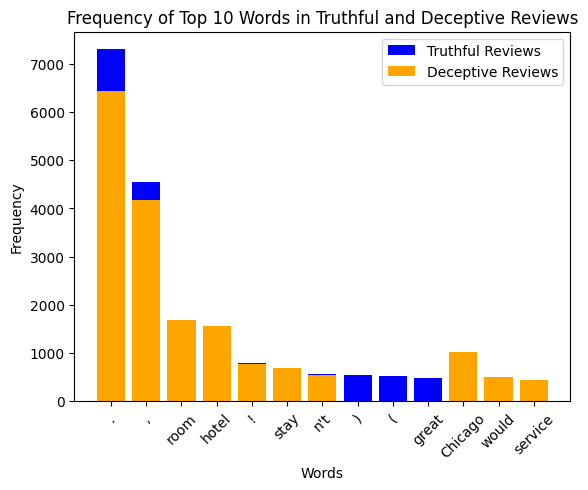

In [ ]:
import matplotlib.pyplot as plt

# Separate truthful and deceptive reviews
truthful_reviews = data[data['deceptive'] == 'truthful']
deceptive_reviews = data[data['deceptive'] == 'deceptive']

# Tokenize and count words for truthful reviews
truthful_word_count = Counter(word_tokenize(' '.join(truthful_reviews['text'])))

# Tokenize and count words for deceptive reviews
deceptive_word_count = Counter(word_tokenize(' '.join(deceptive_reviews['text'])))

# Get the top 10 words for truthful and deceptive reviews
top_10_truthful_words = [word[0] for word in truthful_word_count.most_common(10)]
top_10_deceptive_words = [word[0] for word in deceptive_word_count.most_common(10)]

# Plot frequency of top 10 words
plt.bar(top_10_truthful_words, [truthful_word_count[word] for word in top_10_truthful_words], color='blue', label='Truthful Reviews')
plt.bar(top_10_deceptive_words, [deceptive_word_count[word] for word in top_10_deceptive_words], color='orange', label='Deceptive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Words in Truthful and Deceptive Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.show()